In [1]:
# Mohit Jain 
# Date - 1 June, 2020

<h1> Module 3 : </h1>

In [2]:
#importing necessary libraries : 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

<h3> Question 1 : </h3>

In [3]:
df = pd.read_csv("GOLD.csv")
df["Date"] = pd.to_datetime(df["Date"])

In [4]:
df.head()

,Date,Price,Open,High,Low,Vol.,Change %,Pred,new
0,2017-05-04,28060,28400,28482,28025,0.08K,-1.79%,738.0,117.570740
1,2017-05-05,28184,28136,28382,28135,0.06K,0.44%,-146.0,295.430176
2,2017-05-08,28119,28145,28255,28097,7.85K,-0.23%,30.0,132.123714
3,2017-05-09,27981,28125,28192,27947,10.10K,-0.49%,357.0,101.298064
4,2017-05-10,28007,28060,28146,27981,9.28K,0.09%,124.0,112.153318


In [5]:
lr = LinearRegression()

In [6]:
ind = df[df["Pred"].isna()].index #To find out index of Nan Value

x = df.iloc[0:ind[0], 0:5] # Dependent Values
y = df.iloc[0:ind[0], 7] # Independent Values
x_pred = df.iloc[ind[0]:, 1:5] # Nan Values, that need to be predicted by the model.

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)
x_train_2 = x_train.iloc[:, 1:5]
x_test_2 = x_test.iloc[:, 1:5]

lr.fit(x_train_2, y_train)
pred_test = lr.predict(x_test_2)
lr.coef_

array([ 2.,  3., -1., -4.])

In [7]:
lr.intercept_

3.12070369545836e-11

In [8]:
print(r2_score(y_test, pred_test))

1.0


In [9]:
print(mean_squared_error(y_test, pred_test))

1.364330186922221e-22


In [10]:
df_test = x_test
df_test["Pred"] = y_test
df_test["Pred_New"] = pred_test
df_test = df_test.reset_index()
df_test = df_test.sort_values(by=["index"])
df_test = df_test.set_index("index")
df_test = df_test.set_index("Date")
df_test

,Price,Open,High,Low,Pred,Pred_New
Date,,,,,,
2017-05-05,28184,28136,28382,28135,-146.0,-146.0
2017-05-10,28007,28060,28146,27981,124.0,124.0
2017-05-11,28022,27995,28100,27945,149.0,149.0
2017-05-12,28019,28088,28195,27985,167.0,167.0
2017-05-15,28008,28049,28157,27996,22.0,22.0
...,...,...,...,...,...,...
2018-10-31,31631,31650,31780,31590,72.0,72.0
2018-11-05,31783,31785,31898,31630,503.0,503.0
2018-11-23,30513,30551,30566,30427,405.0,405.0


In [11]:
predictions = lr.predict(x_pred)
predictions

array([ 852.,  422.,  530.,  144.,  415., 1103.,  411.,  613.,    5.,
        547.,  -27.,  368.,  263.,  615.,  479.,  -82.,  489., 2890.,
        340.,  274.,  469.,  487.,  -48.,  364.,    7.,  277.,  283.,
        550.,  110.,  413.,  146.,  241.,  406.,  119.,  405.,  303.,
        154.,  679., 2111.,  860.,  -37.,  615.,  468.,  716.,  410.,
        251.,  466.,  254.,  109.,  470.,  241.,  776.,  471.,  555.,
       -139.,  224.,  603., 3024.,  331., 2895.,  476.,  589.,  233.,
        670.,  152.,   32.,  960.,  359.,  595.,  439.,  586.,   93.,
        741.,  466.,  502.,  159.,  833.,  378.,    6.,  694.,  518.,
        554.,  517.,  202.,  338.,  489., 1070.,   -8.,  579.,  468.,
        223.,  264., -132.,  350.,  359.,  446.,  535.,  438.,  269.,
        601.,  280.])

In [12]:
x_pred["predictions"] = predictions
x_pred

,Price,Open,High,Low,predictions
411,31812,31850,31850,31618,852.0
412,31626,31749,31749,31582,422.0
413,31414,31550,31600,31337,530.0
414,31437,31440,31514,31384,144.0
415,31501,31369,31530,31291,415.0
...,...,...,...,...,...
507,31868,31851,31934,31705,535.0
508,31625,31800,31824,31597,438.0
509,31563,31604,31657,31503,269.0
510,31203,31420,31425,31160,601.0


In [13]:
# To complete the column of Pred Column in the original data frame.
predictions = predictions.round(2)
y = list(y)
predictions = list(predictions)
y.extend(predictions)
df["Pred"] = y

In [14]:
df.tail()

,Date,Price,Open,High,Low,Vol.,Change %,Pred,new
507,2019-04-26,31868,31851,31934,31705,9.67K,0.08%,535.0,247.177322
508,2019-04-30,31625,31800,31824,31597,6.44K,-0.76%,438.0,52.201158
509,2019-05-01,31563,31604,31657,31503,1.55K,-0.20%,269.0,113.293305
510,2019-05-02,31203,31420,31425,31160,0.48K,-1.14%,601.0,48.365693
511,2019-05-03,31341,31250,31500,31163,0.08K,0.44%,280.0,429.924911


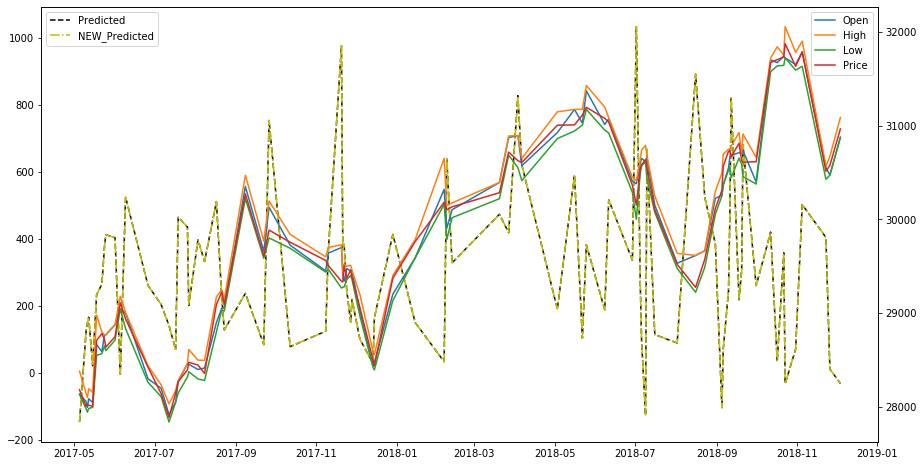

In [15]:
fig = plt.figure(figsize = (15, 8))
ax1 = fig.add_subplot(1,1,1)
ax2 = ax1.twinx()

ax2.plot(df_test["Open"], label="Open")
ax2.plot(df_test["High"], label="High")
ax2.plot(df_test["Low"], label="Low")
ax2.plot(df_test["Price"], label="Price")

ax1.plot(df_test["Pred"], label = "Predicted", color = "black", linestyle = "--")
ax1.plot(df_test["Pred_New"], label = "NEW_Predicted", color = "y", linestyle = "-.")
ax1.legend(loc = "upper left")
ax2.legend(loc = "upper right")

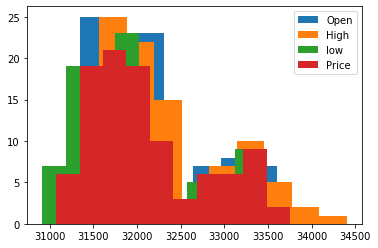

In [16]:
x_pred['Predictions']=predictions
fig=plt.figure()
ax1 = fig.add_subplot(1, 1, 1)


ax1.hist(x_pred['Open'], label='Open'); 
ax1.hist(x_pred['High'], label='High');  
ax1.hist(x_pred['Low'], label='low');  
ax1.hist(x_pred['Price'], label='Price');   


ax1.legend()


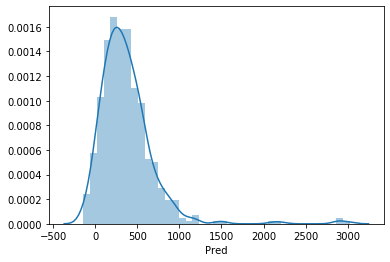

In [17]:
sns.distplot(df["Pred"])

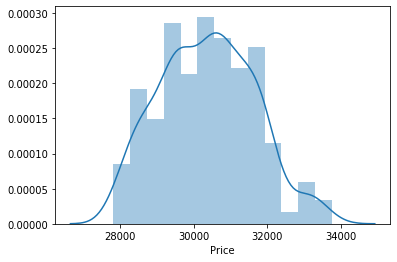

In [18]:
sns.distplot(df["Price"])

In [19]:
# The data frame df after adding Predicted Values.
df 

,Date,Price,Open,High,Low,Vol.,Change %,Pred,new
0,2017-05-04,28060,28400,28482,28025,0.08K,-1.79%,738.0,117.570740
1,2017-05-05,28184,28136,28382,28135,0.06K,0.44%,-146.0,295.430176
2,2017-05-08,28119,28145,28255,28097,7.85K,-0.23%,30.0,132.123714
3,2017-05-09,27981,28125,28192,27947,10.10K,-0.49%,357.0,101.298064
4,2017-05-10,28007,28060,28146,27981,9.28K,0.09%,124.0,112.153318
...,...,...,...,...,...,...,...,...,...
507,2019-04-26,31868,31851,31934,31705,9.67K,0.08%,535.0,247.177322
508,2019-04-30,31625,31800,31824,31597,6.44K,-0.76%,438.0,52.201158
509,2019-05-01,31563,31604,31657,31503,1.55K,-0.20%,269.0,113.293305
510,2019-05-02,31203,31420,31425,31160,0.48K,-1.14%,601.0,48.365693


In [20]:
# To apply model on Column New :

In [21]:
from sklearn.preprocessing import PolynomialFeatures

In [22]:
X = df.iloc[:, 0:5]
Y = df.iloc[:, 8]
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.3, random_state = 0)
X_train_2 = X_train.iloc[:, 1:5]
X_test_2 = X_test.iloc[:, 1:5]

In [23]:
# Now applying linear regression : 
lr.fit(X_train_2, Y_train)
new_pred_lr = lr.predict(X_test_2)
r2_score(Y_test, new_pred_lr)

0.9999916114573492

In [24]:
# Now applying Polynomial Regression to get a more accurate score :
Polynomial = PolynomialFeatures(degree = 2)
X_poly = Polynomial.fit_transform(X_train_2)
#Polynomial.fit(X_poly, Y_train) 
lr = LinearRegression()
lr.fit(X_poly, Y_train)
new_pred_poly = lr.predict(Polynomial.fit_transform(X_test_2))

In [25]:
r2_score(Y_test, new_pred_poly)

0.9999999902555515

In [26]:
df_new = X_test
df_new["new"] = Y_test
df_new["new_Linear"] = new_pred_lr
df_new["new_Poly"] = new_pred_poly
df_new = df_new.reset_index()
df_new = df_new.sort_values(by=["index"])
df_new = df_new.set_index("index")
df_new = df_new.set_index("Date")
df_new

,Price,Open,High,Low,new,new_Linear,new_Poly
Date,,,,,,,
2017-05-05,28184,28136,28382,28135,295.430176,295.447631,295.417024
2017-05-10,28007,28060,28146,27981,112.153318,111.690458,112.123883
2017-05-11,28022,27995,28100,27945,182.427089,182.324262,182.420361
2017-05-12,28019,28088,28195,27985,141.255137,141.024583,141.243358
2017-05-15,28008,28049,28157,27996,120.069010,119.493583,120.029719
...,...,...,...,...,...,...,...
2019-04-18,31403,31474,31544,31355,118.289332,117.863375,118.301035
2019-04-22,31531,31497,31697,31497,234.215894,233.773259,234.211253
2019-04-24,31759,31480,31799,31450,631.428967,632.182426,631.426240


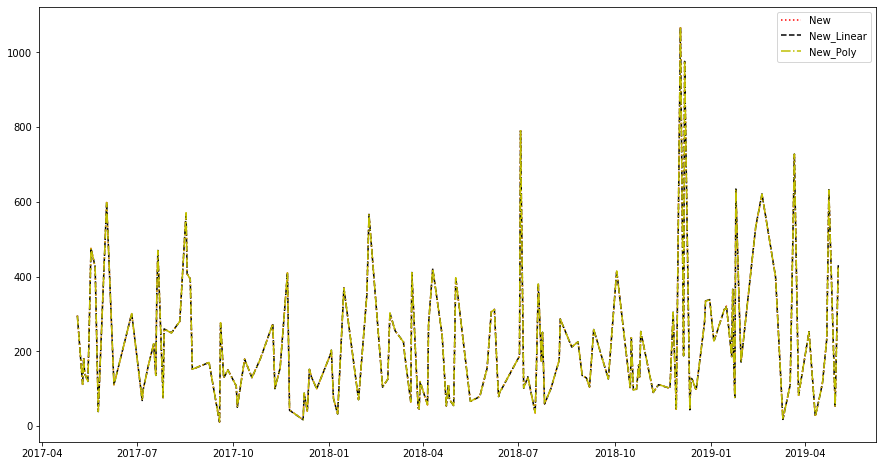

In [27]:
fig = plt.figure(figsize = (15, 8))
ax1 = fig.add_subplot(1,1,1)

ax1.plot(df_new["new"], label = "New", color = "r", linestyle = ":")
ax1.plot(df_new["new_Linear"], label = "New_Linear", color = "black", linestyle = "--")
ax1.plot(df_new["new_Poly"], label = "New_Poly", color = "y", linestyle = "-.")
ax1.legend(loc = "upper right")


<h3> Question 2 : </h3>

In [28]:
import statsmodels.api as sm
from statsmodels.regression.linear_model import OLS

In [29]:
Infosys = pd.read_csv("INFY.csv", parse_dates=["Date"], index_col = "Date")
Infosys = Infosys[Infosys.Series=="EQ"]
Nifty50 = pd.read_csv("Nifty50.csv", parse_dates=["Date"], index_col = "Date")

In [30]:
Infosys.head()

,Symbol,Series,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty
Date,,,,,,,,,,,,,,
2017-05-15,INFY,EQ,964.25,963.5,963.50,949.10,953.25,951.55,951.49,3648582,3.471580e+09,75335,3052819,83.67
2017-05-16,INFY,EQ,951.55,953.1,960.15,946.95,956.00,955.00,952.92,3065084,2.920775e+09,71808,1858063,60.62
2017-05-17,INFY,EQ,955.00,951.6,958.45,943.85,952.90,952.80,949.48,1457754,1.384110e+09,75429,792251,54.35
2017-05-18,INFY,EQ,952.80,943.0,973.90,942.85,960.25,961.75,962.61,4028924,3.878282e+09,120990,2309450,57.32
2017-05-19,INFY,EQ,961.75,961.5,962.70,947.85,957.40,957.95,954.18,2128698,2.031155e+09,88897,1457747,68.48


In [31]:
Nifty50.head()

,Open,High,Low,Close,Shares Traded,Turnover (Rs. Cr)
Date,,,,,,
2017-05-15,9433.55,9449.25,9423.10,9445.40,145163953,7790.97
2017-05-16,9461.00,9517.20,9456.35,9512.25,171709433,9209.89
2017-05-17,9517.60,9532.60,9486.10,9525.75,211856040,10726.23
2017-05-18,9453.20,9489.10,9418.10,9429.45,199340647,10782.46
2017-05-19,9469.90,9505.75,9390.75,9427.90,259861396,11544.77


In [32]:
close_prices = pd.concat([ Infosys["Close Price"], Nifty50["Close"]], axis = 1)
close_prices.columns = ["INFOSYS", "NIFTY50"]
close_prices

,INFOSYS,NIFTY50
Date,,
2017-05-15,951.55,9445.40
2017-05-16,955.00,9512.25
2017-05-17,952.80,9525.75
2017-05-18,961.75,9429.45
2017-05-19,957.95,9427.90
...,...,...
2019-05-07,724.55,11497.90
2019-05-08,719.35,11359.45
2019-05-09,721.05,11301.80


In [33]:
# Daily returns for last 3 months : 
# Assuming 90 days in last 3 months
price_returns = close_prices.tail(90).pct_change().dropna(axis = 0)
price_returns.tail()

,INFOSYS,NIFTY50
Date,,
2019-05-07,0.008561,-0.008652
2019-05-08,-0.007177,-0.012041
2019-05-09,0.002363,-0.005075
2019-05-10,-0.005825,-0.002026
2019-05-13,0.003976,-0.011588


In [34]:
X  = price_returns['NIFTY50']
Y  = price_returns['INFOSYS']
X1 = sm.add_constant(X)

model = OLS( Y, X1 )
model.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                INFOSYS   R-squared:                       0.127
Model:                            OLS   Adj. R-squared:                  0.117
Method:                 Least Squares   F-statistic:                     12.61
Date:                Mon, 01 Jun 2020   Prob (F-statistic):           0.000623
Time:                        02:39:53   Log-Likelihood:                 269.57
No. Observations:                  89   AIC:                            -535.1
Df Residuals:                      87   BIC:                            -530.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0009      0.001      0.689      0.493      -0.002       0.003
NIFTY50        0.6490      0.183      3.551      0.001       0.286       1.012
==============================================================================
Omnibus:                        0.108   Durbin-Watson:                   1.832
Prob(Omnibus):                  0.947   Jarque-Bera (JB):                0.138
Skew:                          -0.077   Prob(JB):                        0.933
Kurtosis:                       2.885   Cond. No.                         146.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [35]:
#Infosys Beta value = 0.6490, which is less than 1 
#If Beta value is lower than 1, it indicates that a stock's price is steadier than most stocks.

In [36]:
# Monthly returns : 
Nifty50['month'] = Nifty50.index.map(lambda date: f"{date.year}-{date.month}")
Infosys['month'] = Infosys.index.map(lambda date: f"{date.year}-{date.month}")

In [37]:
Nifty50_monthly    = Nifty50.groupby('month').last()
Infosys_monthly = Infosys.groupby('month').last()
Infosys_monthly.head()

,Symbol,Series,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty
month,,,,,,,,,,,,,,
2017-10,INFY,EQ,944.10,925.00,930.00,920.00,922.00,921.85,924.74,4977494,4.602897e+09,68301,3547519,71.27
2017-11,INFY,EQ,982.70,989.45,989.45,968.35,972.50,976.10,978.17,8633472,8.445011e+09,126288,5893906,68.27
2017-12,INFY,EQ,1033.25,1030.10,1048.80,1030.00,1041.25,1042.05,1041.38,3300884,3.437462e+09,83693,2238793,67.82
2017-5,INFY,EQ,996.20,993.55,993.55,974.85,976.05,977.05,980.19,3881950,3.805051e+09,121323,3086038,79.50
2017-6,INFY,EQ,930.20,930.80,938.00,929.00,934.40,935.55,934.42,2108350,1.970090e+09,64325,1526984,72.43


In [38]:
returns_monthly = pd.concat([ Infosys_monthly['Close Price'], Nifty50_monthly['Close'] ], axis=1)
returns_monthly.pct_change().dropna()
returns_monthly.columns = ['Infosys', 'Nifty50']
returns_monthly.head()

,Infosys,Nifty50
month,,
2017-10,921.85,10335.30
2017-11,976.10,10226.55
2017-12,1042.05,10530.70
2017-5,977.05,9621.25
2017-6,935.55,9520.90


In [39]:
X  = returns_monthly['Nifty50']
Y  = returns_monthly['Infosys']
X1 = sm.add_constant(X)

model = OLS( Y, X1 )
model.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Infosys   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.043
Method:                 Least Squares   F-statistic:                   0.02132
Date:                Mon, 01 Jun 2020   Prob (F-statistic):              0.885
Time:                        02:39:53   Log-Likelihood:                -171.41
No. Observations:                  25   AIC:                             346.8
Df Residuals:                      23   BIC:                             349.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        840.4095    853.235      0.985      0.335    -924.641    2605.460
Nifty50        0.0117      0.080      0.146      0.885      -0.154       0.177
==============================================================================
Omnibus:                        2.846   Durbin-Watson:                   0.812
Prob(Omnibus):                  0.241   Jarque-Bera (JB):                1.583
Skew:                           0.325   Prob(JB):                        0.453
Kurtosis:                       1.953   Cond. No.                     1.90e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.9e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [40]:
#Infosys's monthly Beta value = 0.0117, which is less than 1
#If Beta value is lower than 1, it indicates that a stock's price is steadier than most stocks.

<h3>Question : What if it(beta) was negative? </h3> 
<h5>Answer : If beta is less than 0, it will indicate an inverse relation to the market, this is possible but highly unlikely.</h5> 

<h3> Summary and Inferences : </h3>

In [41]:
#Beta Value for both cases
#Beta value for Daily Returns in last 3 months = 0.6490
#Beta value for monthly returns = 0.0117
#Both the Beta values are less than one, which means that the Infosys stock is more steadier than most stocks, 
#Which also means that Infosys Stock can be considered less risky. Which also means that Infosys stock is less volatile and 
#hence it swings less as compared to the market in general.

In [42]:
#The linear regression results suggests that the "pred" column in the gold.csv is a linear combinbation of OHLC.
#Hence it is the reason why linear regression gave accurate results. 
#We achived quite perfect r2_score of 1.0.
#The predictions were exact and accurate.

#While the "new" column is a polynomial function of OHLC.
#In case of "new" column, better results were achieved when we applied Polynomial Regression
#However the r2_score achieved in both the methods was quite close which was around 0.999.
#Although the r2)score of Polynomial Regression was better than that of Linear Regression.


<h1> MODULE 3 ENDS here, Thank You </h1>